In [179]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scikitplot as skplt
import scipy
%matplotlib inline
from scipy.stats import linregress
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from statistics import mean
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

1533148882_failures.csv  HackDay4.ipynb           Untitled.ipynb


In [3]:
df = pd.read_csv("1533148882_failures.csv")

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.head(-10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124479,2015-11-02,W1F0G9T7,0,159174456,0,0,0,13,354826,104,104,2
124480,2015-11-02,W1F0JH87,0,130553176,0,4,0,11,354600,0,0,0
124481,2015-11-02,W1F0JXDL,0,80454336,160,0,0,10,357655,0,0,0
124482,2015-11-02,W1F0JY02,0,226850672,0,0,0,8,351379,0,0,0


In [6]:
abs(df.corr()['failure']).sort_values(ascending = False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
Name: failure, dtype: float64

In [7]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [9]:
def cutoffgreater(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]<cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [94]:
def plotattributes(dfin):
    
    dfin = dfin.select_dtypes(exclude=['object'])
    
    for elem in dfin:
        plt.hist(dfin[elem], bins=200)
        plt.yscale('log')

        plt.ylabel('counts', fontsize=13)
        plt.xlabel(str(elem), fontsize=13)
        plt.show()

In [11]:
abs(df.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

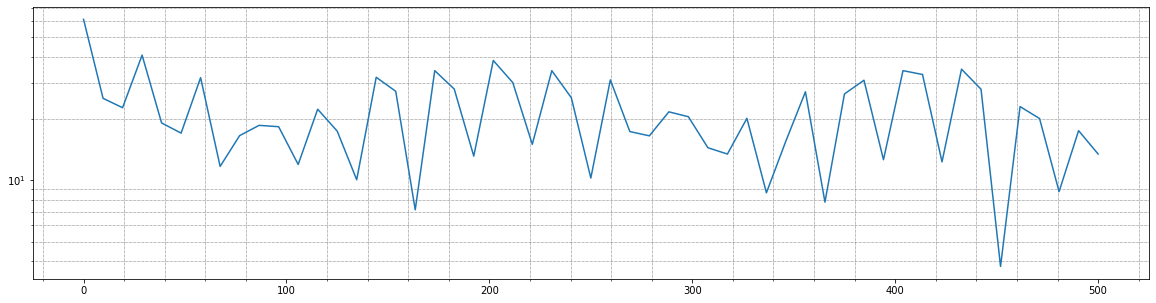

In [211]:
df_new = df[df['failure'] == 1]


plt.figure(figsize = (20,5))
yf = scipy.fftpack.fft(df_new['attribute8'])
N= len(yf)
T = 1/1000.0
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2])) 
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.yscale('log')

In [205]:
xf

array([  0.        ,   9.61538462,  19.23076923,  28.84615385,
        38.46153846,  48.07692308,  57.69230769,  67.30769231,
        76.92307692,  86.53846154,  96.15384615, 105.76923077,
       115.38461538, 125.        , 134.61538462, 144.23076923,
       153.84615385, 163.46153846, 173.07692308, 182.69230769,
       192.30769231, 201.92307692, 211.53846154, 221.15384615,
       230.76923077, 240.38461538, 250.        , 259.61538462,
       269.23076923, 278.84615385, 288.46153846, 298.07692308,
       307.69230769, 317.30769231, 326.92307692, 336.53846154,
       346.15384615, 355.76923077, 365.38461538, 375.        ,
       384.61538462, 394.23076923, 403.84615385, 413.46153846,
       423.07692308, 432.69230769, 442.30769231, 451.92307692,
       461.53846154, 471.15384615, 480.76923077, 490.38461538,
       500.        ])

In [210]:
1/28.8

0.034722222222222224

In [229]:
df[df['failure'] == 1].head(50)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
14734,2015-01-17,W1F0T034,1,154998752,1312,0,18,10,306996,0,0,0
15087,2015-01-18,S1F0GG8X,1,54292264,64736,0,160,11,192179,0,0,2
15773,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
15859,2015-01-19,S1F0QY11,1,159635352,0,0,9,7,231336,16,16,0
15898,2015-01-19,S1F0S2WJ,1,238299872,1184,0,0,14,268662,8,8,0


In [221]:
dfmod = df.truncate(before=4885)

In [227]:
dfmod.shape[0]/28.5

4196.80701754386

array([0.00000000e+00, 6.42611573e-03, 1.28522315e-02, ...,
       3.99987148e+02, 3.99993574e+02, 4.00000000e+02])

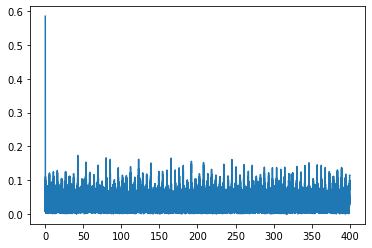

In [159]:
df_new = df

yf = scipy.fftpack.fft(df_new['attribute7'])
N=len(yf)
T = 1/800.0
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))  

xf

In [13]:
def GenerateClassPlot(dfin, elem_x, elem_y, model = RandomForestClassifier()):
    
    #model = RandomForestClassifier()
    model.fit(dfin[elem_x].to_frame(), dfin[elem_y])
    x_pred = pd.DataFrame(np.linspace(0, dfin[elem_x].max(), dfin[elem_y].shape[0]))
    y_pred = pd.DataFrame(model.predict(x_pred))
    y_true = dfin[elem_y].to_frame()
    
    accuracy = accuracy_score(y_true, y_pred)
    
    #print(x_pred.shape, y_pred.shape, y_true.shape, df[elem_x].to_frame().shape)
    
    fig1 = plt.figure(figsize = (20,5))
    fig1.suptitle(str(elem_x), fontsize=16)
    a = fig1.add_subplot(131)
    a.plot(x_pred, y_pred, 'r')
    a.scatter(dfin[elem_x].to_frame(), y_true)
    a.set_ylabel('Probability of Failure', fontsize=13)
    a.set_xlabel(str(elem_x), fontsize=13)

    b = fig1.add_subplot(132)
    b.hist(dfin[elem_x], bins=200)
    b.set_yscale('log')
    b.set_ylabel('counts', fontsize=13)
    b.set_xlabel(str(elem_x), fontsize=13)
    
    c = fig1.add_subplot(133)
    fpr, tpr, _ = roc_curve(y_true,  y_pred)
    auc = roc_auc_score(y_true, y_pred)
    c.plot(fpr,tpr,label=str(elem_x)+"\nAUC: "+str(auc)[:6] + "\nAccuracy: "+str(accuracy)[:6])
    c.set_ylabel('True Positive Rate', fontsize=13)
    c.set_xlabel('False Positive Rate', fontsize=13)
    c.legend(loc=4)
    


In [14]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [147]:
df.head(100)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-01-01,S1F0GKFX,0,107148272,0,0,0,65,223170,0,0,0
96,2015-01-01,S1F0GKL6,0,234778096,0,0,0,90,221425,0,0,0
97,2015-01-01,S1F0GPFZ,0,53071760,0,0,0,8,195262,0,0,0
98,2015-01-01,S1F0GPXY,0,22380768,0,0,0,8,196205,0,0,0


In [213]:
df[df['failure'] == 1].shape

(106, 12)

In [214]:
df[df['failure'] == 0].shape

(124388, 12)

In [164]:
def plotfailureattrvstime(dfin, elem_x):
    
    fig1 = plt.figure(figsize = (20,5))
    a = fig1.add_subplot(121)
    b = fig1.add_subplot(122)
    if(elem_x != 'date' and elem_x != 'device'):
        dfin_x = dfin[dfin['failure'] == 1]
        dfin_y = dfin_x.drop(['date'], axis=1)
        dfin_x2 = dfin[dfin['failure'] == 0]
        dfin_y2 = dfin_x2.drop(['date'], axis=1)
        
        a.plot(dfin_x2['date'], dfin_y2[elem_x], zorder=0)
        a.plot(dfin_x['date'], dfin_y[elem_x], zorder=10)
        a.set_ylabel(str(elem_x), fontsize=13)
        a.set_xlabel('Date', fontsize=13)
        a.set_yscale('log')
        a.title.set_text('Time Domain of '+str(elem_x))

        yf = scipy.fftpack.fft(dfin_y[elem])
        N = len(yf)
        T = 1/1000.0
        xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
        
        yf2 = scipy.fftpack.fft(dfin_y2[elem])
        N2 = len(yf)
        T2 = 1/1000.0
        xf2 = np.linspace(0.0, 1.0/(2.0*T), N/2)
        
        b.plot(xf2, 2.0/N * np.abs(yf2[:N//2]), zorder = 0) 
        b.plot(xf, 2.0/N * np.abs(yf[:N//2]), zorder = 0)  
        b.minorticks_on()
        b.set_yscale('log')
        b.set_ylabel('Amplitude')
        b.set_xlabel('Frequency (1/index)')
        b.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        b.title.set_text('FFT of '+str(elem_x))

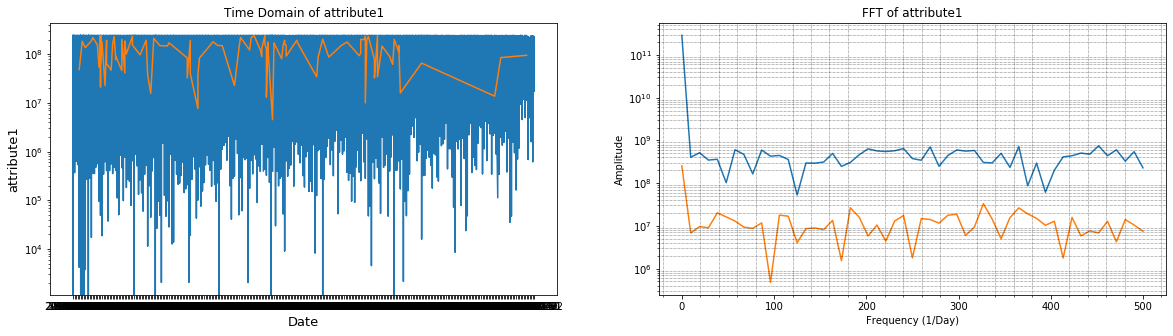

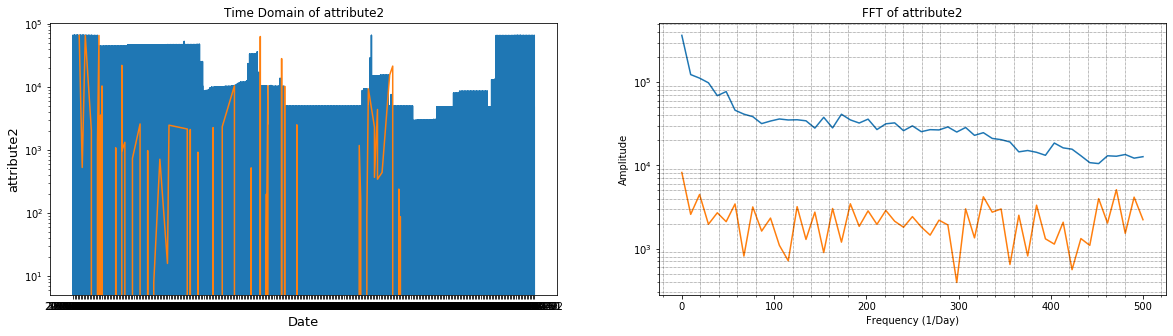

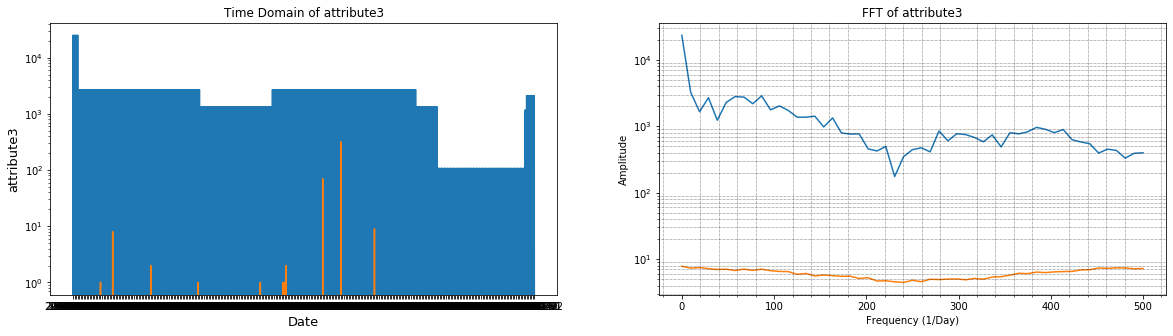

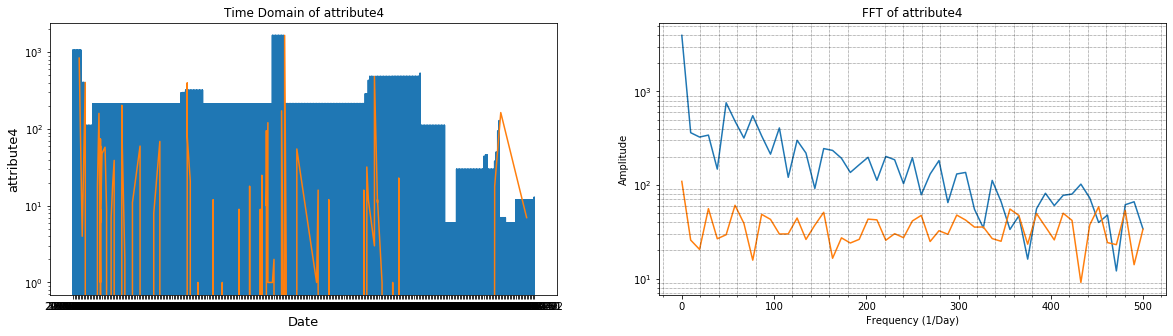

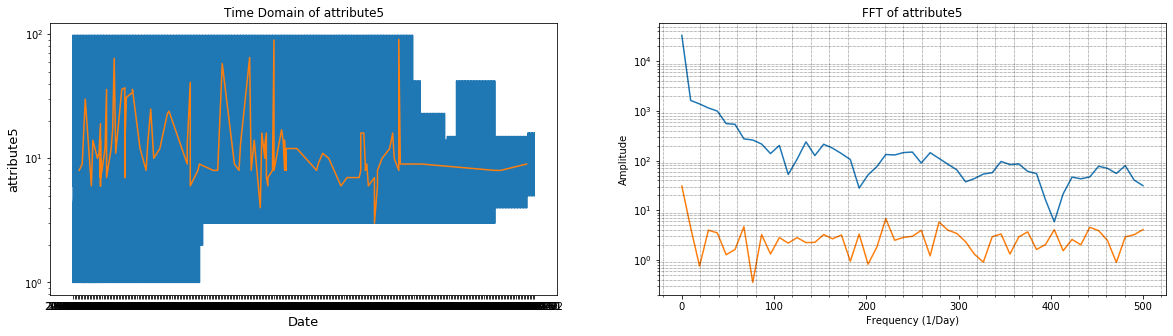

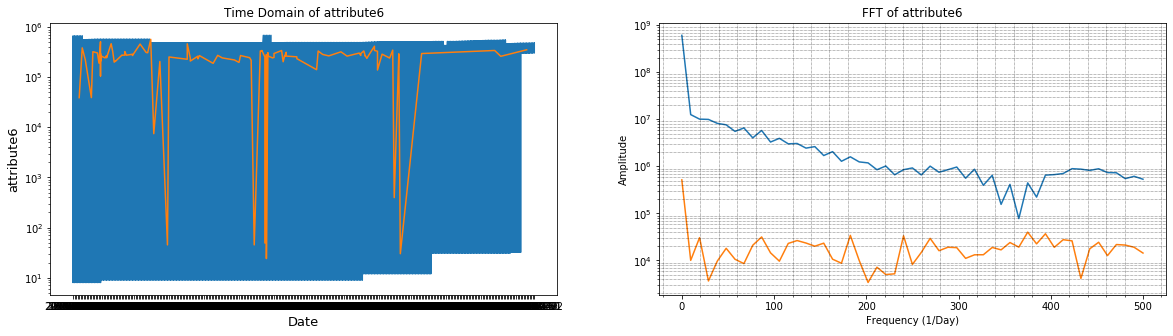

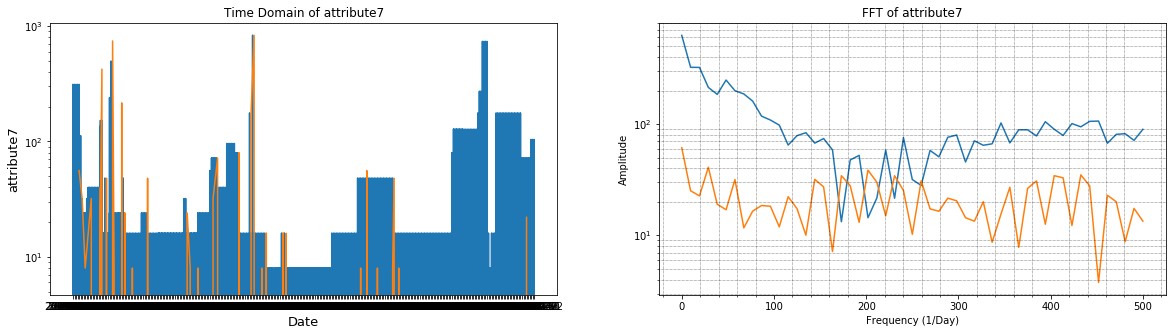

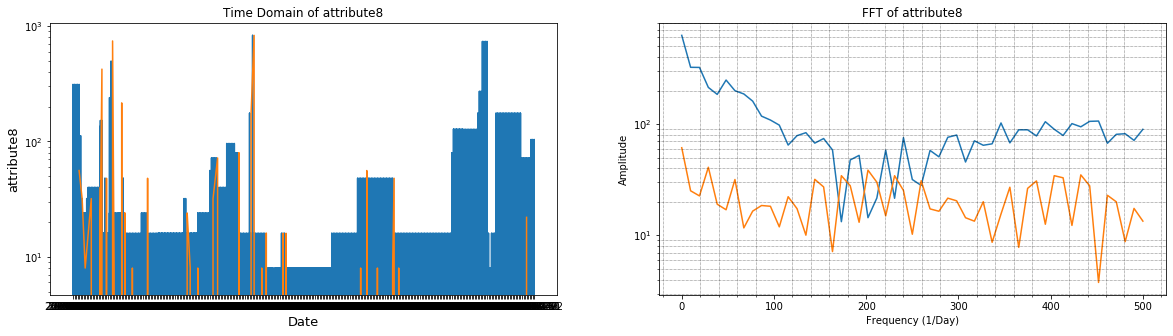

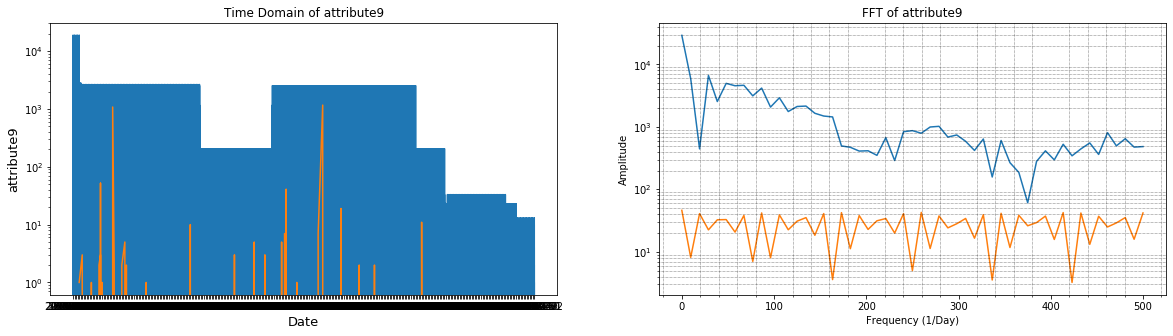

In [165]:
for elem in df:
    if(elem != 'date' and elem != 'device' and elem != 'failure'):
        plotfailureattrvstime(df, elem)

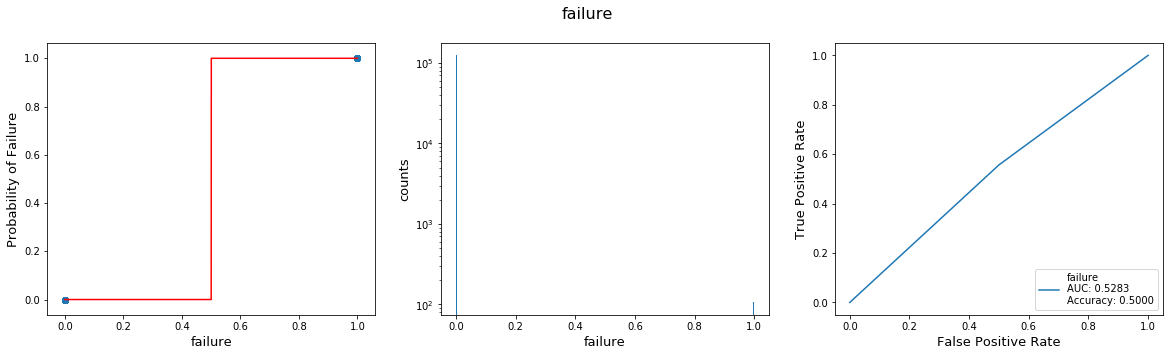

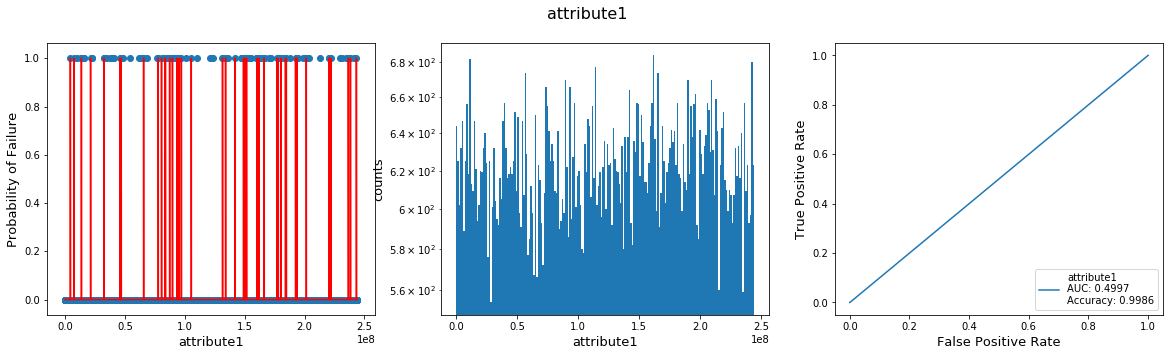

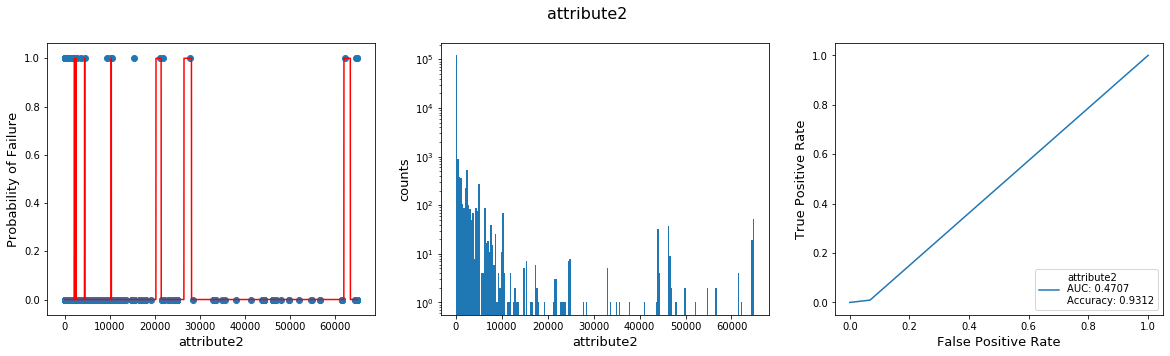

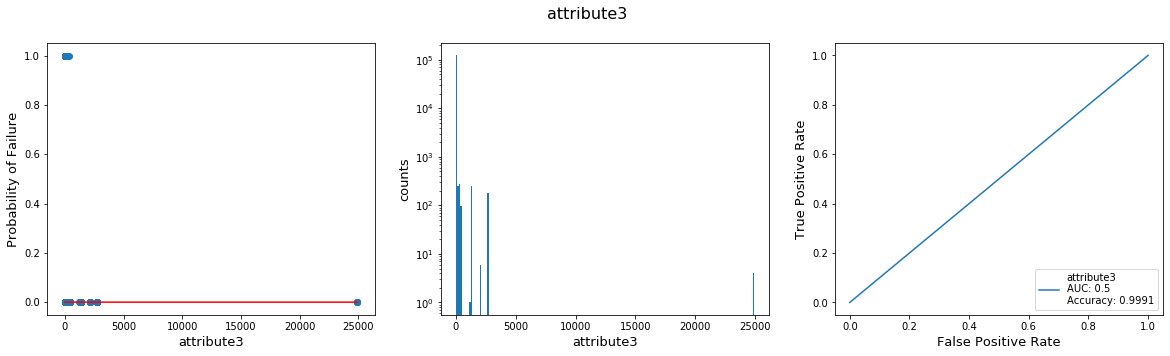

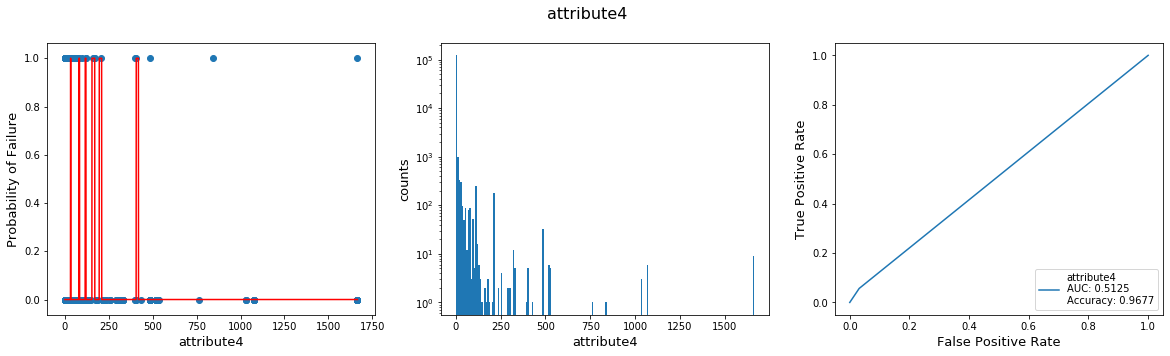

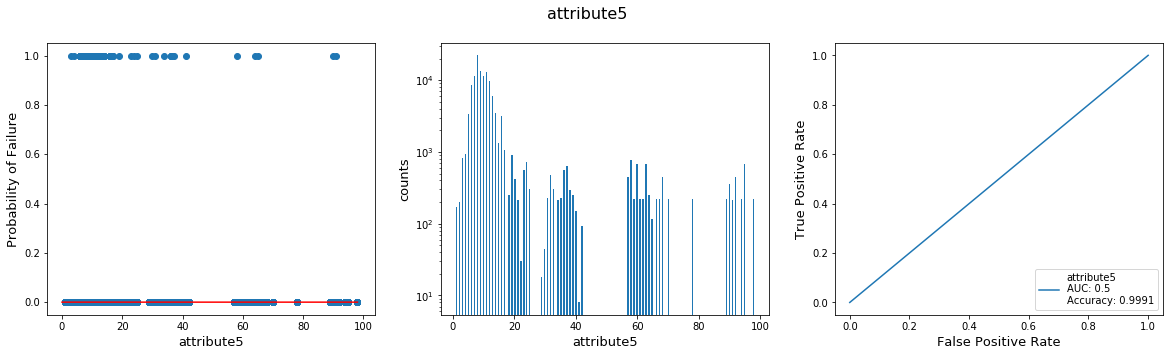

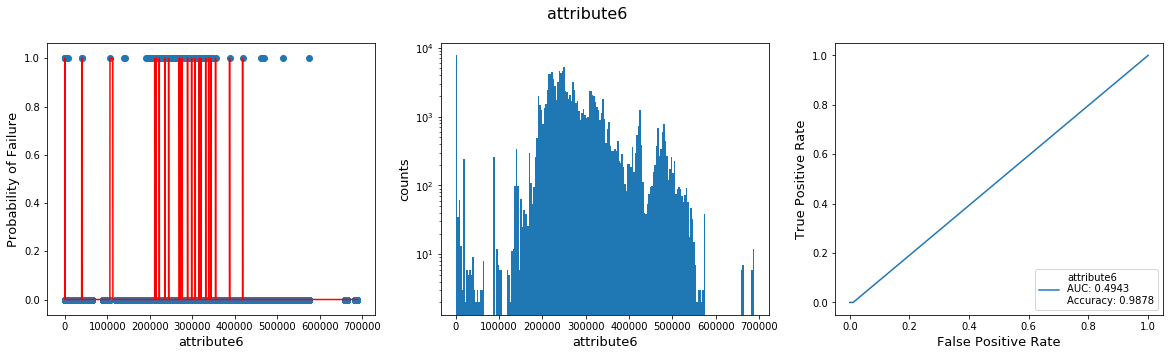

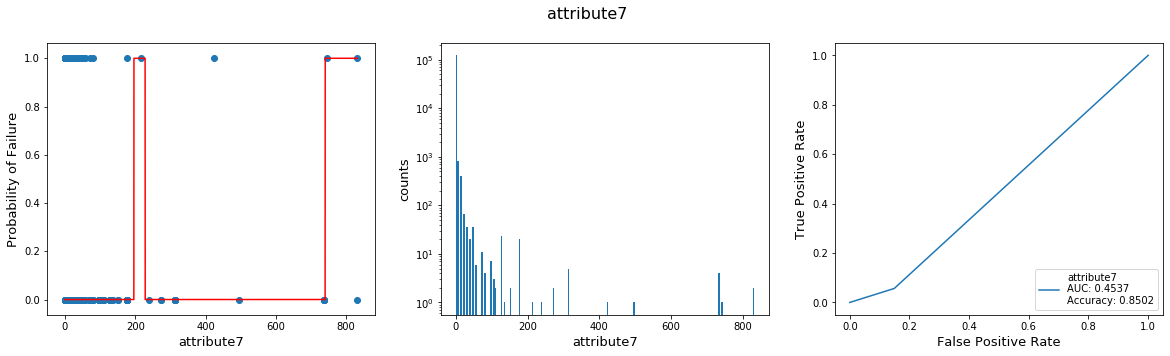

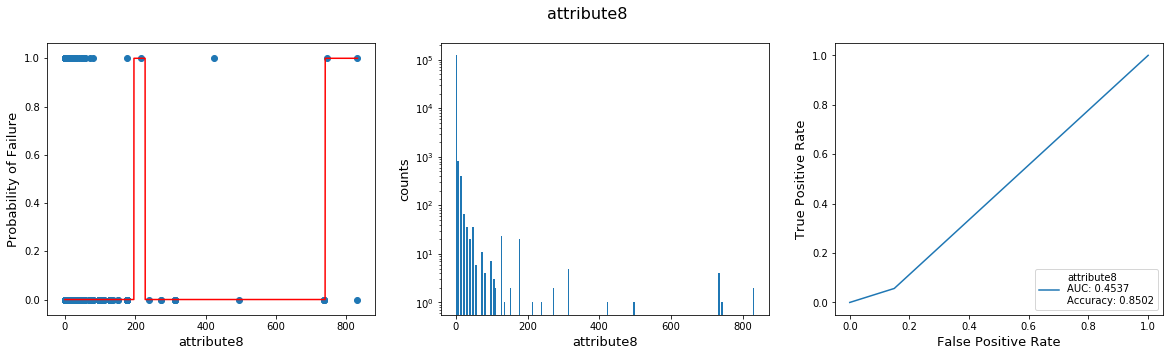

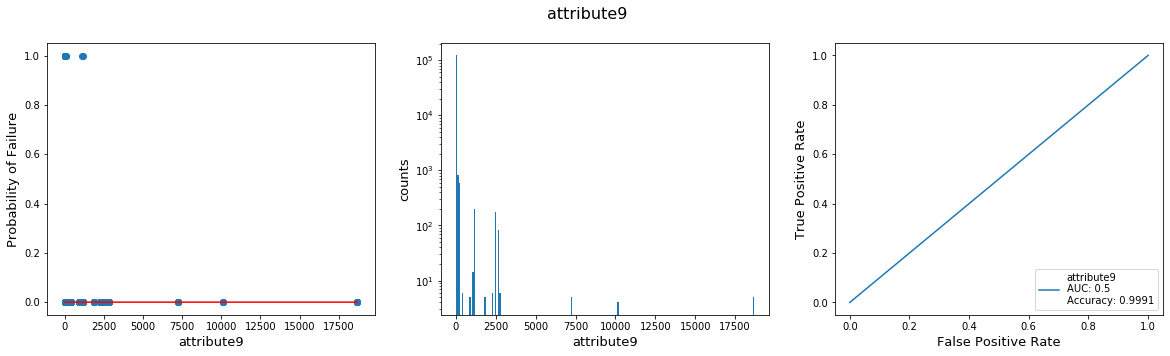

In [15]:
for elem in df1:
    GenerateClassPlot(df1, elem, 'failure')
    

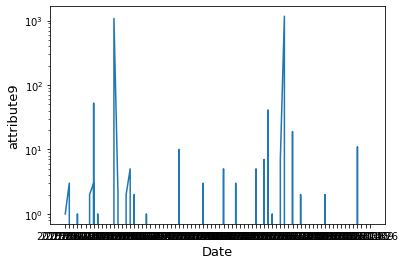

In [84]:
plotfailureattrvstime(df, 'attribute9', 1)

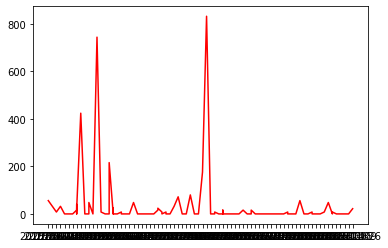

In [80]:
dfin_1 =df

dfin_y = dfin_1[dfin_1['failure'] == 1]
dfin_1 = dfin_y.drop(['date'], axis=1)

plt.plot(dfin_y['date'], dfin_y['attribute8'], 'r')
plt.show()

In [66]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [16]:
df.shape[0]

124494

In [17]:
df.duplicated().sum()

0

In [18]:
S1F0 = df[df['device'].astype(str).str[:4].str.contains('S1F0')]
S1F0.shape

(33169, 12)

In [19]:
S1F1 = df[df['device'].astype(str).str[:4].str.contains('S1F1')]
S1F1.shape

(21689, 12)

In [20]:
W1F0 = df[df['device'].astype(str).str[:4].str.contains('W1F0')]
W1F0.shape

(23294, 12)

In [21]:
W1F1 = df[df['device'].astype(str).str[:4].str.contains('W1F1')]
W1F1.shape

(19974, 12)

In [22]:
Z1F0 = df[df['device'].astype(str).str[:4].str.contains('Z1F0')]
Z1F0.shape

(18869, 12)

In [23]:
Z1F1 = df[df['device'].astype(str).str[:4].str.contains('Z1F1')]
Z1F1.shape

(7248, 12)

In [24]:
Z1F2 = df[df['device'].astype(str).str[:4].str.contains('Z1F2')]
Z1F2.shape

(251, 12)

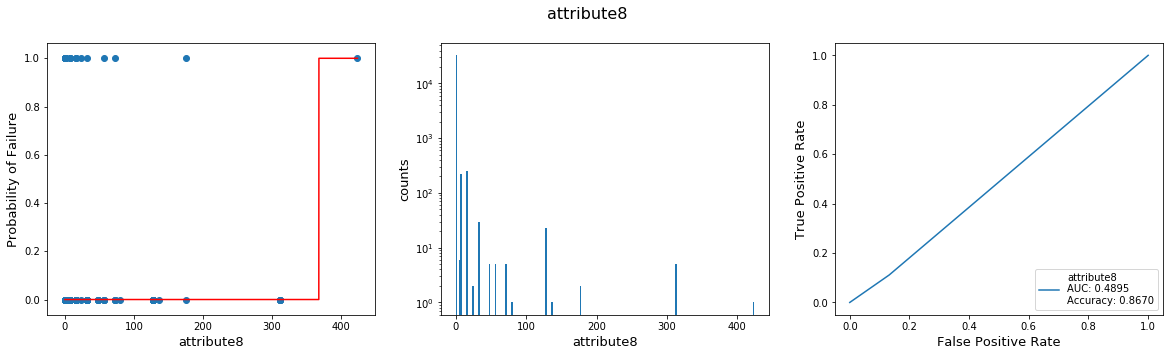

In [25]:
GenerateClassPlot(S1F0, 'attribute8', 'failure')

In [26]:
abs(S1F0.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.124930
attribute7    0.124930
attribute4    0.075472
attribute2    0.054880
attribute6    0.009972
attribute1    0.008457
attribute5    0.004172
attribute3    0.002918
attribute9    0.003660
Name: failure, dtype: float64

In [27]:
abs(S1F1.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.169823
attribute7    0.169823
attribute2    0.149058
attribute4    0.035196
attribute5    0.009960
attribute6    0.004405
attribute9    0.000270
attribute3    0.001846
attribute1    0.010341
Name: failure, dtype: float64

In [28]:
abs(W1F0.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.201484
attribute7    0.201484
attribute4    0.101489
attribute2    0.101412
attribute9    0.036119
attribute5    0.007062
attribute6    0.002828
attribute1    0.001042
attribute3    0.002839
Name: failure, dtype: float64

In [29]:
abs(W1F1.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.133516
attribute7    0.133516
attribute4    0.032495
attribute1    0.014029
attribute2    0.012262
attribute5    0.000849
attribute9    0.003280
attribute3    0.003893
attribute6    0.012508
Name: failure, dtype: float64

In [30]:
abs(Z1F0.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.173086
attribute7    0.173086
attribute4    0.106899
attribute9    0.023889
attribute3    0.019859
attribute2    0.017798
attribute1    0.005500
attribute6    0.009443
attribute5    0.010399
Name: failure, dtype: float64

In [31]:
abs(Z1F1.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute4    0.123531
attribute2    0.070831
attribute8    0.046748
attribute7    0.046748
attribute6    0.009109
attribute5    0.005035
attribute3    0.000165
attribute9    0.001273
attribute1    0.009059
Name: failure, dtype: float64

In [32]:
abs(Z1F2.corr()['failure'].sort_values(ascending = False))

failure      NaN
attribute1   NaN
attribute2   NaN
attribute3   NaN
attribute4   NaN
attribute5   NaN
attribute6   NaN
attribute7   NaN
attribute8   NaN
attribute9   NaN
Name: failure, dtype: float64

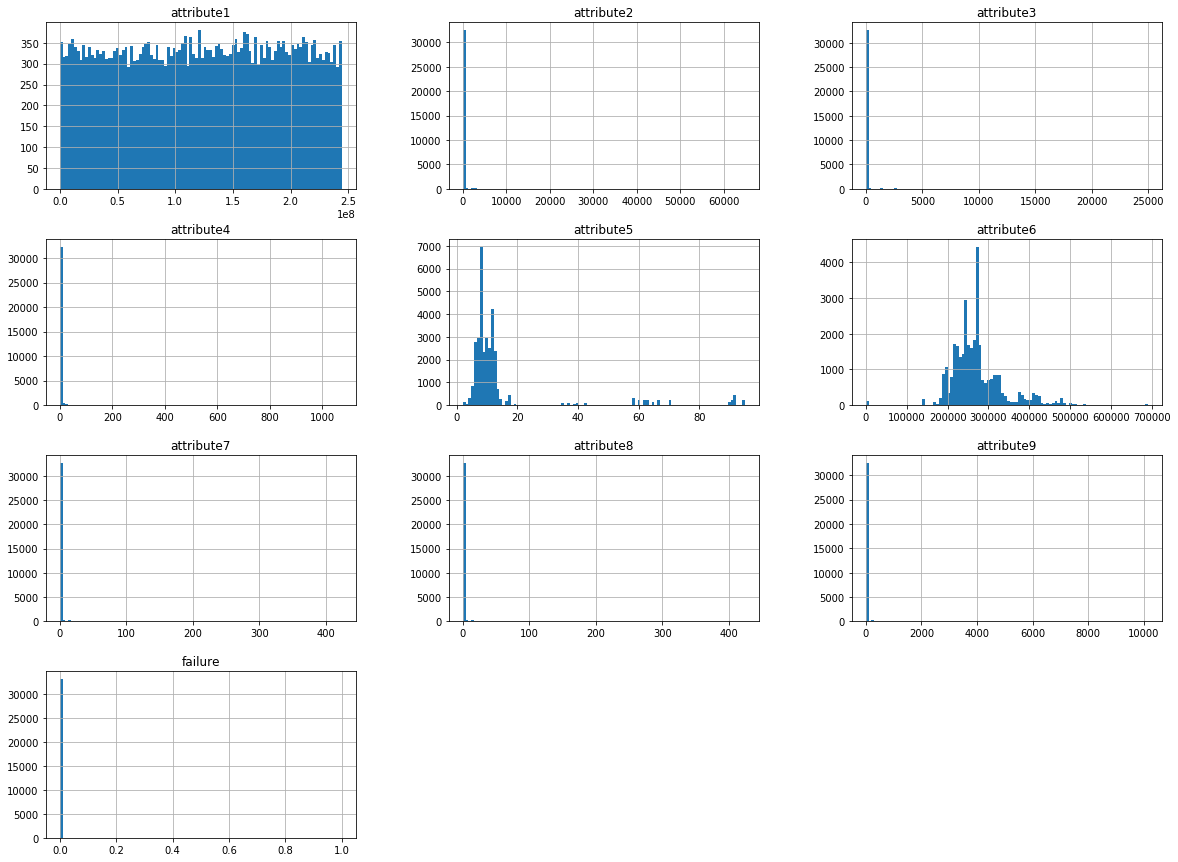

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
S1F0.hist(bins=100, figsize=(20,15))
plt.show()

In [34]:
#df.date.unique()

In [35]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [36]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [37]:
df1['attribute1'].max()

244140480

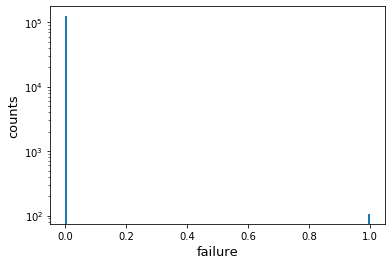

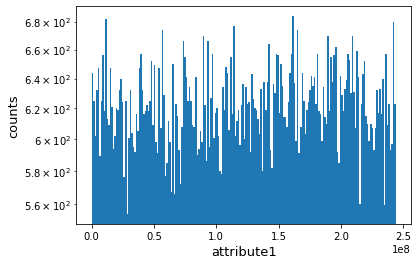

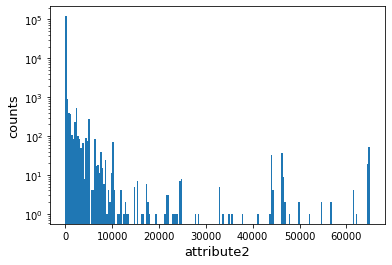

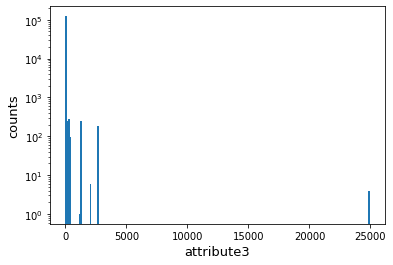

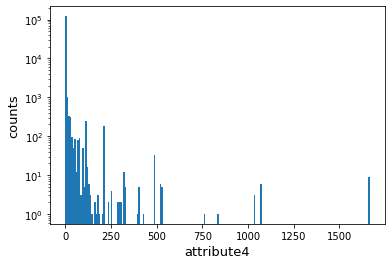

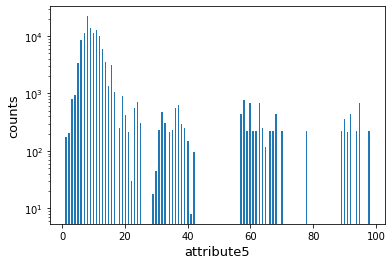

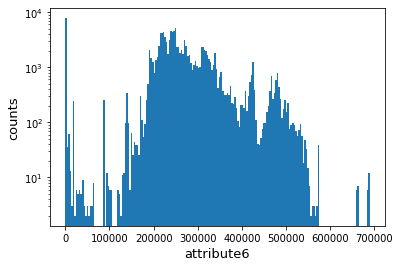

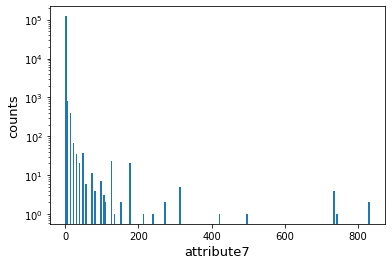

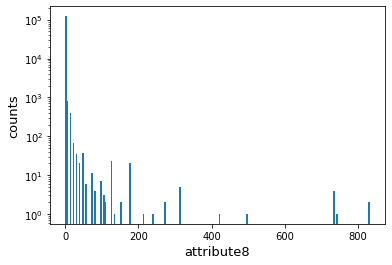

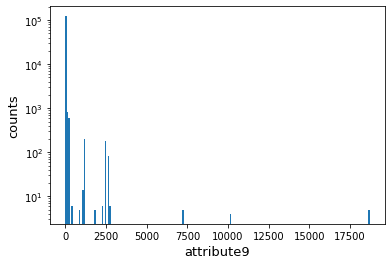

In [38]:
plotattributes(df)

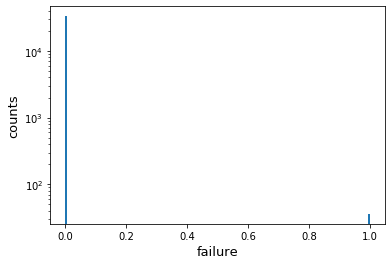

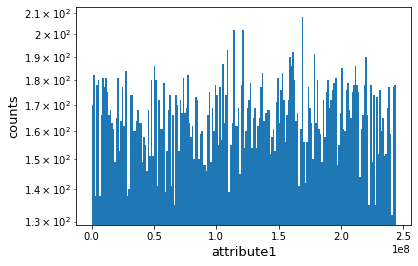

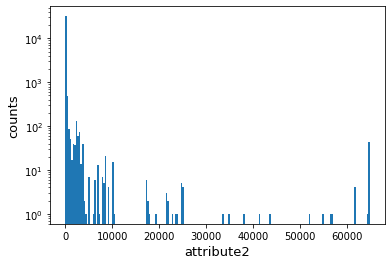

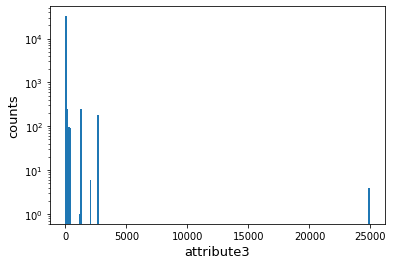

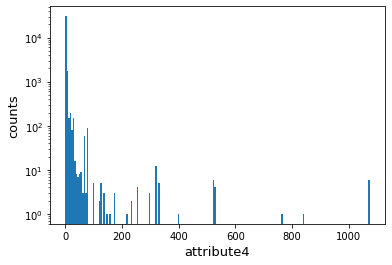

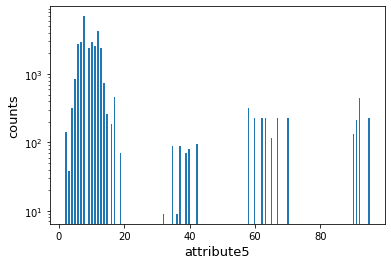

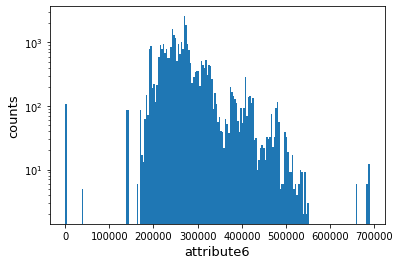

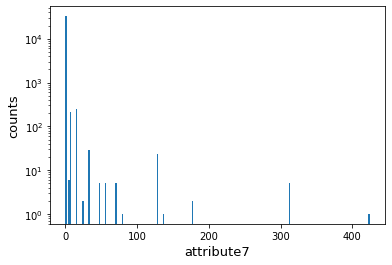

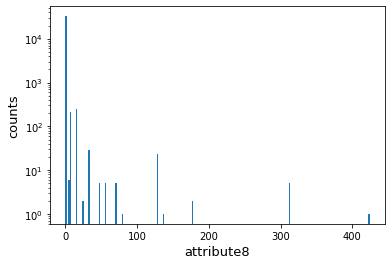

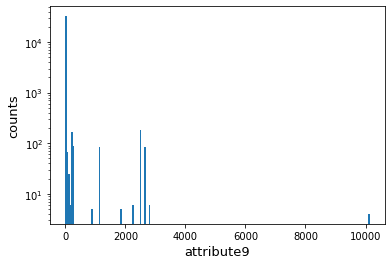

In [39]:
plotattributes(S1F0)

In [40]:
def cutoffgreater(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]<cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [41]:
df1, TrainingSize = cutoffgreater(df1, 'attribute2', 60000)
df1['attribute2'] = df1['attribute2'].apply(lambda x:np.log(x+1))

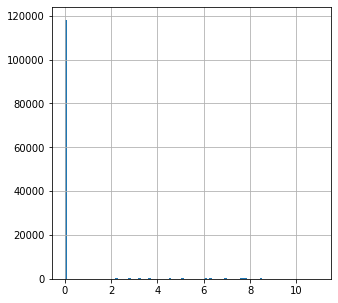

In [42]:
df1['attribute2'].hist(bins=100, figsize=(5,5))

In [43]:
df1['attribute3'].unique()

array([    0,     3,     1,   323,   266,     2,    14,     9, 24929,
         382,  1326,     5,   406,  1331,    21,   208,   220,  2693,
          10,    12,   263,    72,   100,     8,   377,    11,     4,
          62,    25,    56,    34,    16,    61,     7,    18,    70,
         318,    15,    36,    53,   279,    24,    35,    38,   107,
        1162,  2112])

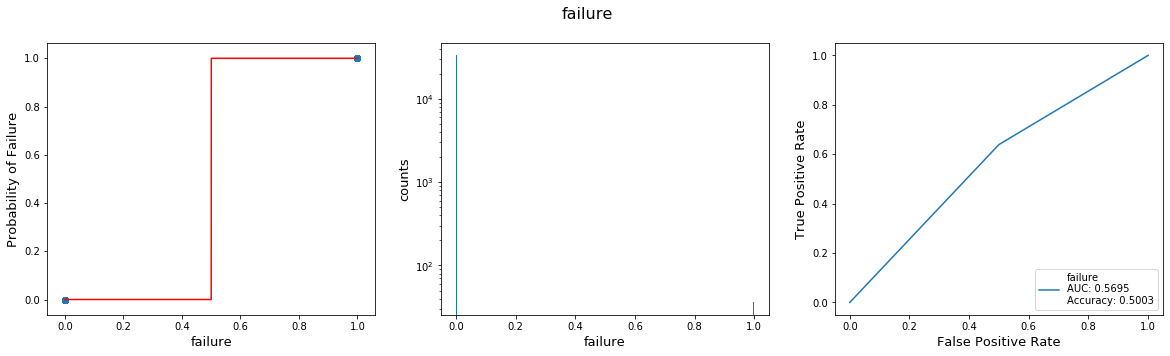

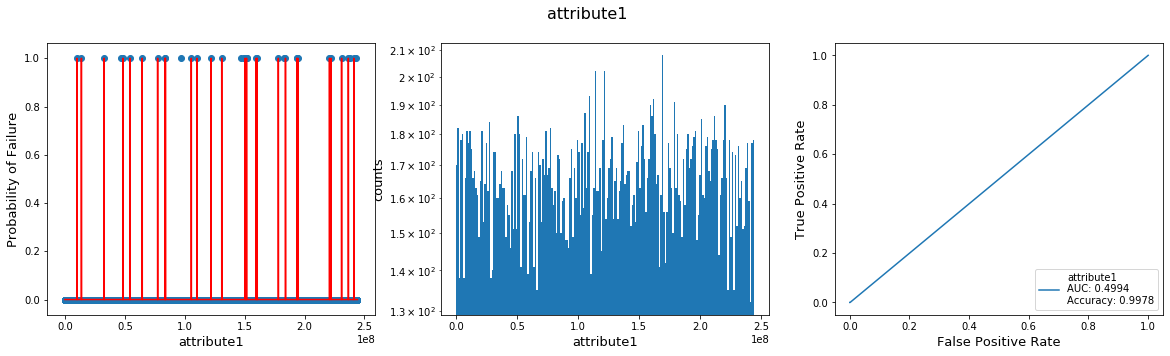

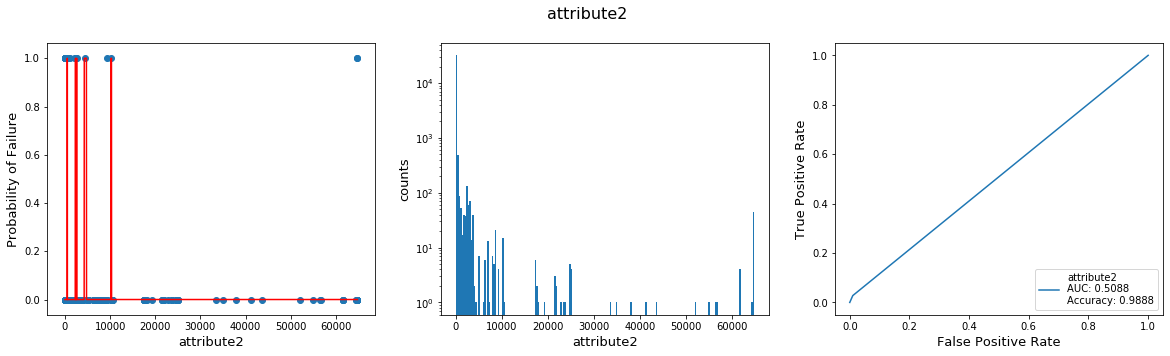

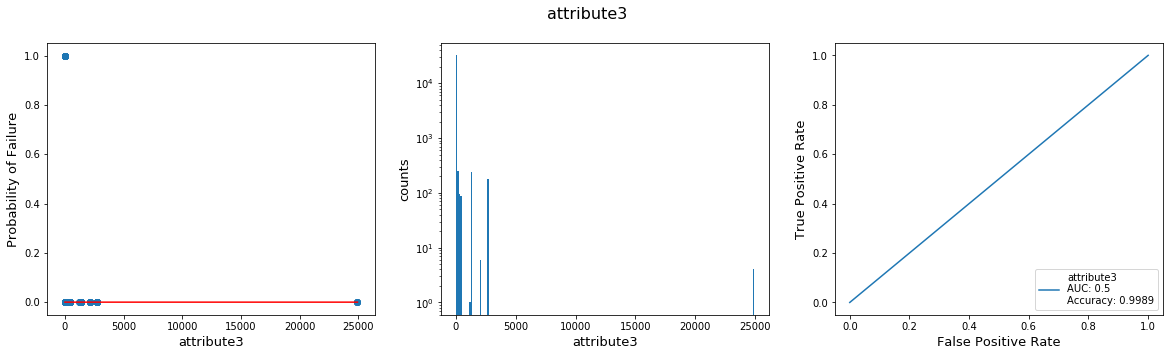

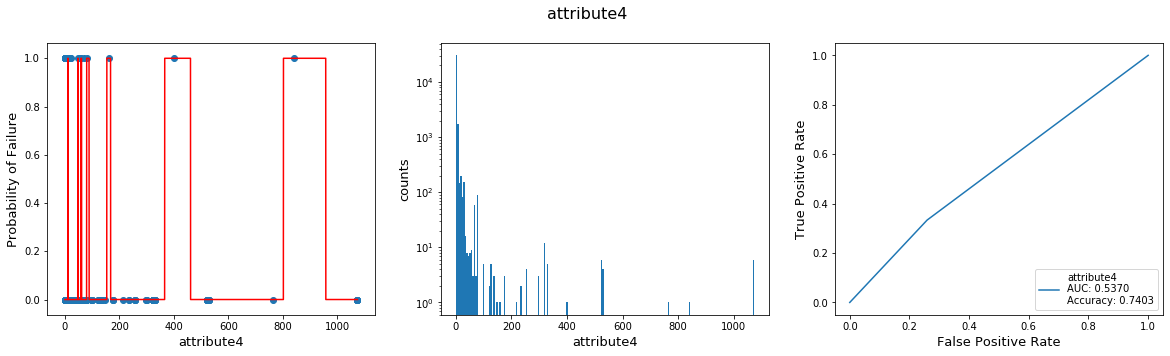

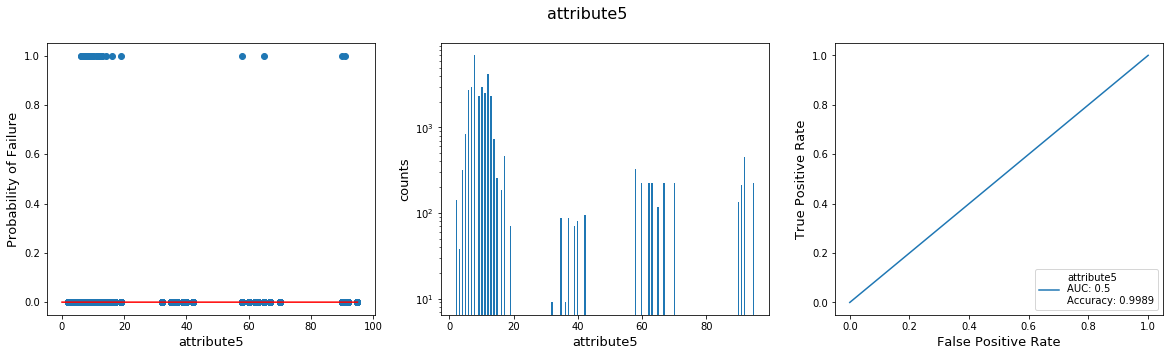

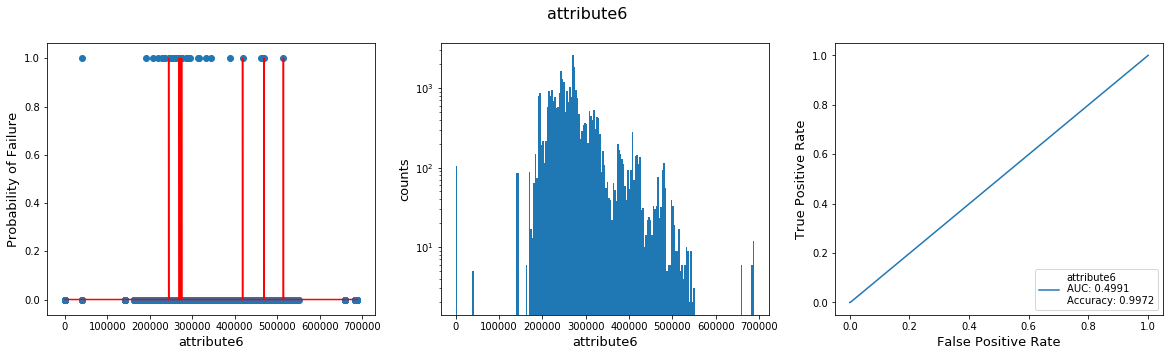

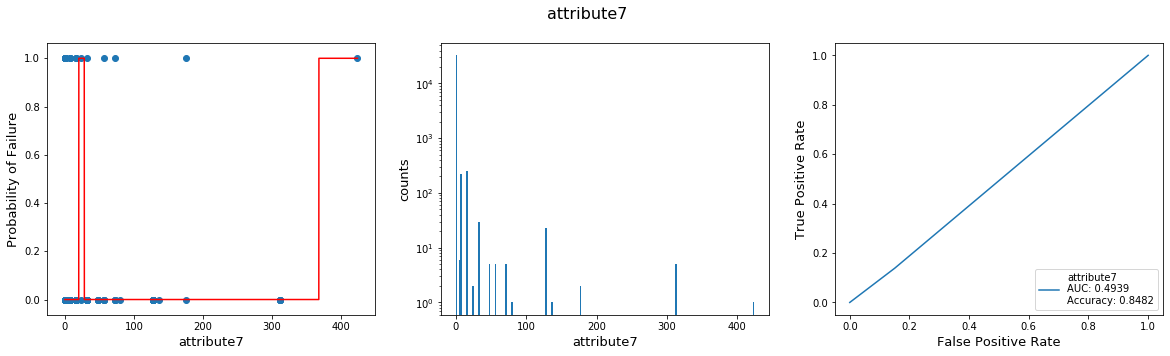

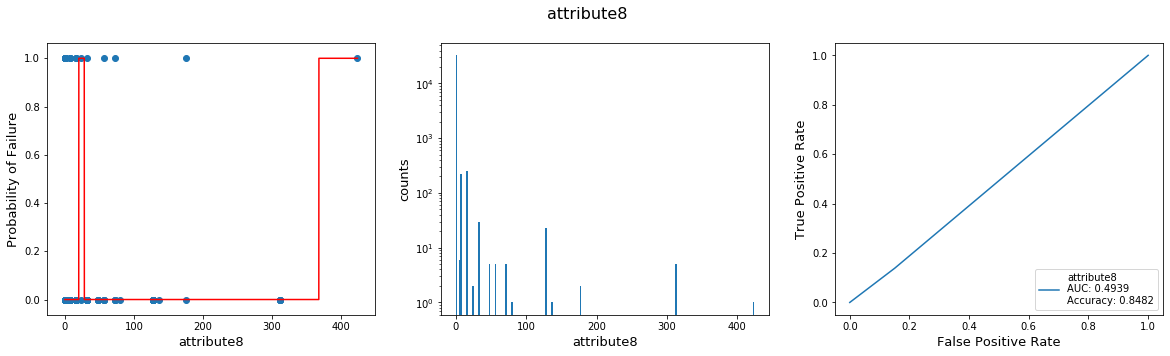

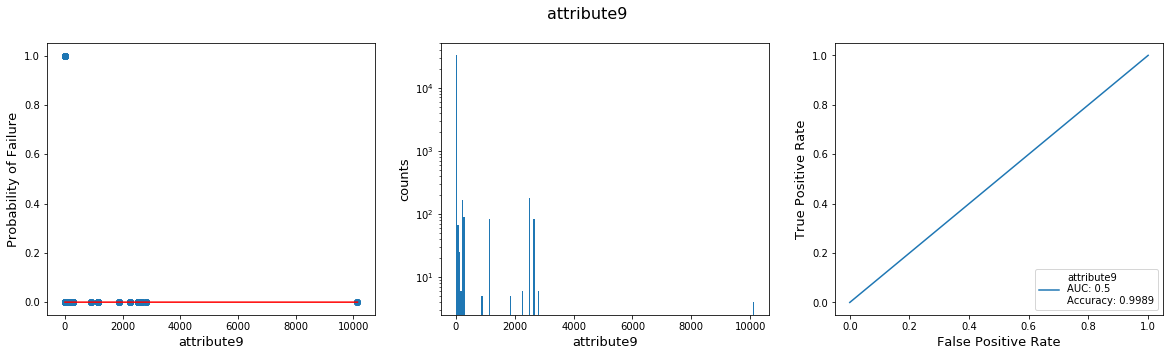

In [44]:
S1F0 = S1F0.select_dtypes(exclude=['object'])
for elem in S1F0:
    GenerateClassPlot(S1F0, elem, 'failure',GradientBoostingClassifier())

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
def OptimalRegression(XData, y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    
    algorithms = [g,b,k,log,d,r,gbc]
    names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest', 'GradientBoost']

    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(XData, y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(XData)))
        precision.append(precision_score(y, algorithms[i].predict(XData)))
        recall.append(recall_score(y, algorithms[i].predict(XData)))
        f1.append(f1_score(y, algorithms[i].predict(XData)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [47]:
OptimalRegression(S1F0.drop(['failure'], axis=1), S1F0['failure'])

,Accuracy,Precision,Recall,F1
Single Tree,1.000000,1.000000,1.000000,1.000000
GradientBoost,0.999789,0.939394,0.861111,0.898551
Random Forest,0.999699,1.000000,0.722222,0.838710
BernoulliNB,0.987910,0.030848,0.333333,0.056471
GaussianNB,0.995749,0.018349,0.055556,0.027586
K Nearest,0.998915,0.000000,0.000000,0.000000
Logistic,0.998915,0.000000,0.000000,0.000000
